# Лабараторная работа №4 LinearRegression

## Описание задачи

## Описание методов

## Решение задачи с помощью LinearRegression

In [13]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
lib = {'scikit-learn' : sklearn, 'pandas' : pd, 'numpy' : np, 'matplotlib' : matplotlib, 'seaborn' : sns}
for i in lib:
    print(f'{i} version :{lib[i].__version__}')

scikit-learn version :0.23.2
pandas version :1.1.2
numpy version :1.19.2
matplotlib version :3.3.2
seaborn version :0.11.0


In [9]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
X = df.loc[:, :'rain']
y = pd.DataFrame(df.area)

In [11]:
print(X["month"].value_counts())
print(X['day'].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [12]:
X["month"] = df.month.replace({"jan": 1, "feb":2, "mar":3, "apr":4,"may":5,"jun":6,
                               "jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12,})

X['day'] = df.day.replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7})
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


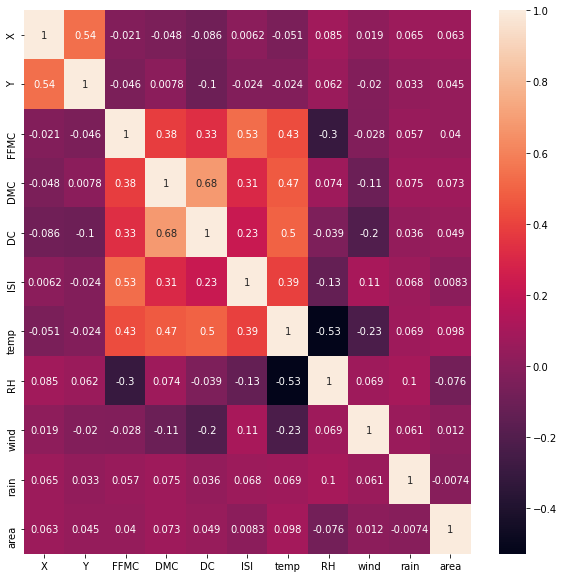

In [17]:
cols = ['X','Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
fig, ax = plt.subplots(figsize=(10,10)) 
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

<AxesSubplot:xlabel='DC', ylabel='DMC'>

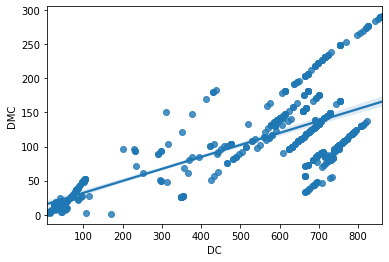

In [18]:
sns.regplot(x="DC", y="DMC", data=df)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

grid_params = {
    'fit_intercept' : [True, False] , 
    'normalize' : [True, False],
    'n_jobs' : [-1]
    
}

gs_knn = GridSearchCV(LinearRegression(), grid_params, scoring='neg_mean_squared_error', cv=5)
gs_knn.fit(X_train, y_train)

print(f'Best score MSE : {-(gs_knn.best_score_)}')
print(f'Best parametrs : {gs_knn.best_params_}')

Best score MSE : 2148.2834423325485
Best parametrs : {'fit_intercept': False, 'n_jobs': -1, 'normalize': True}


In [ ]:
model.decision_function() – решающая функция – для некоторых
моделей

In [ ]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2);